In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('train.csv')

## Check weights over time

In [2]:
df[:10]

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
0,0,0.000000,0.009916,0.014079,0.008773,0.001390,0.006270,1,-1.872746,-2.191242,...,NaN,1.168391,8.313583,1.782433,14.018213,2.653056,12.600292,2.301488,11.445807,0
1,0,16.673515,-0.002828,-0.003226,-0.007319,-0.011114,-0.009792,-1,-1.349537,-1.704709,...,NaN,-1.178850,1.777472,-0.915458,2.831612,-1.417010,2.297459,-1.304614,1.898684,1
2,0,0.000000,0.025134,0.027607,0.033406,0.034380,0.023970,-1,0.812780,-0.256156,...,NaN,6.115747,9.667908,5.542871,11.671595,7.281757,10.060014,6.638248,9.427299,2
3,0,0.000000,-0.004730,-0.003273,-0.000461,-0.000476,-0.003200,-1,1.174378,0.344640,...,NaN,2.838853,0.499251,3.033732,1.513488,4.397532,1.266037,3.856384,1.013469,3
4,0,0.138531,0.001252,0.002165,-0.001215,-0.006219,-0.002604,1,-3.172026,-3.093182,...,NaN,0.344850,4.101145,0.614252,6.623456,0.800129,5.233243,0.362636,3.926633,4
5,0,0.000000,-0.001047,-0.002700,0.000743,0.004667,0.001282,-1,-1.499681,-1.928023,...,NaN,0.337112,4.079450,0.613967,6.622410,0.799525,5.231833,0.360831,3.922324,5
6,0,0.190575,-0.001939,-0.002301,0.001088,0.005963,0.000709,-1,-3.172026,-3.093182,...,NaN,0.336873,4.076447,0.614783,6.622176,0.800618,5.231595,0.361506,3.921714,6
7,0,3.820844,0.017395,0.021361,0.031163,0.036970,0.033473,-1,0.446050,-0.466210,...,NaN,2.101997,4.846202,1.479875,5.261328,2.305066,4.571762,2.201537,4.429745,7
8,0,0.116557,-0.005460,-0.007301,-0.009085,-0.003546,-0.001677,1,-3.172026,-3.093182,...,NaN,1.537913,4.785838,1.637435,6.968002,2.354338,5.825499,1.778029,4.740577,8
9,0,0.160117,0.005976,0.004345,0.023712,0.035360,0.020317,1,2.744408,1.412127,...,NaN,1.796860,3.177064,0.999252,2.906432,1.589816,2.435999,1.472419,2.245991,9


In [203]:
countPN = df.groupby('date')['feature_0'].sum()
countPN

date
0      113
1     -257
2       53
3     -131
4      491
      ... 
495   -435
496    212
497    197
498    162
499   -205
Name: feature_0, Length: 500, dtype: int64

In [7]:
avgReturnsDay = df.assign(returns = df['weight']*df['resp']).groupby('date')['returns'].mean().to_frame().reset_index()

C:\Users\Cynthia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


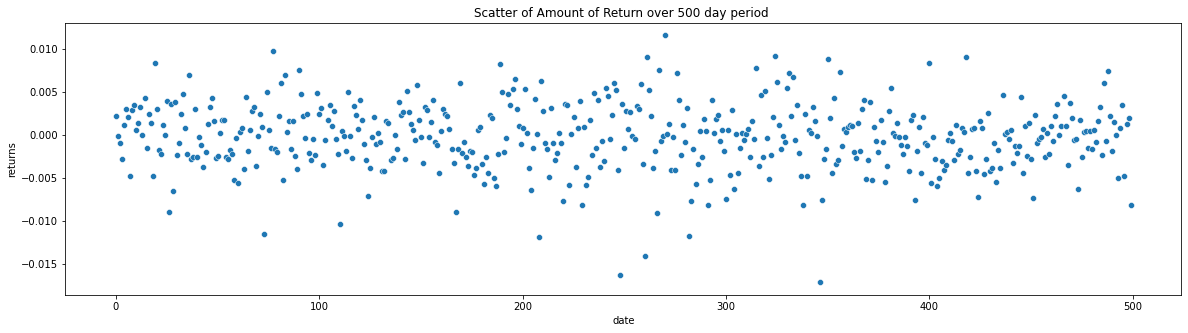

In [209]:
plt.figure(figsize=(20,5))
sns.scatterplot(avgReturnsDay['date'], avgReturnsDay['returns'])
plt.title('Scatter of Amount of Return over 500 day period ')
plt.show()

In [19]:
bins = np.arange(-1, 500, 25)
avgReturnsDay['bin'] = pd.Series(pd.cut(avgReturnsDay['date'],bins))

In [28]:
binSummary = avgReturnsDay.groupby('bin')['returns'].agg(['mean', 'sum', 'min', 'max']).reset_index()
binSummary['range'] = binSummary['max'] - binSummary['min']
binSummary

,bin,mean,sum,min,max,range
0,"(-1, 24]",0.000879,0.021967,-0.004814,0.008311,0.013125
1,"(24, 49]",0.000053,0.001337,-0.008965,0.006950,0.015915
2,"(49, 74]",-0.000783,-0.019586,-0.011463,0.004997,0.016460
3,"(74, 99]",0.000982,0.024547,-0.005185,0.009770,0.014956
4,"(99, 124]",-0.000013,-0.000334,-0.010315,0.004956,0.015270
5,"(124, 149]",0.000257,0.006425,-0.004162,0.005789,0.009951
6,"(149, 174]",-0.000394,-0.009844,-0.008988,0.006003,0.014991
7,"(174, 199]",0.000014,0.000348,-0.005952,0.008265,0.014217
8,"(199, 224]",-0.000846,-0.021142,-0.011833,0.006265,0.018098
9,"(224, 249]",-0.000358,-0.008943,-0.016277,0.006018,0.022295


C:\Users\Cynthia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


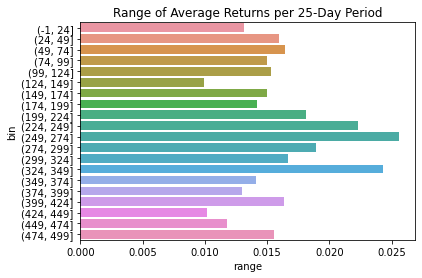

In [211]:
import seaborn as sns

#sns.barplot(binSummary['mean'], binSummary['bin'])
sns.barplot(binSummary['range'], binSummary['bin'])
plt.title('Range of Average Returns per 25-Day Period')
plt.show()

In [38]:
bigBin = avgReturnsDay.assign(bin = pd.cut(avgReturnsDay['date'], np.arange(-1, 500, 100)))
bigBin

,date,returns,bin
0,0,0.002156,"(-1, 99]"
1,1,-0.000105,"(-1, 99]"
2,2,-0.000919,"(-1, 99]"
3,3,-0.002757,"(-1, 99]"
4,4,0.001107,"(-1, 99]"


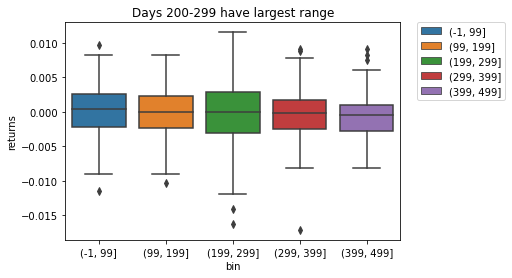

In [214]:
sns.boxplot(x='bin', y='returns', data=bigBin, hue='bin', dodge=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Days 200-299 have largest range')
plt.show()

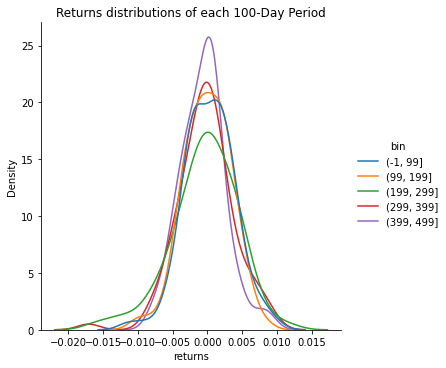

In [215]:
sns.displot(bigBin, x='returns', hue='bin', kind = 'kde')
plt.title('Returns distributions of each 100-Day Period')
plt.show()

In [107]:
bigBin['bin'].unique()

[(-1, 99], (99, 199], (199, 299], (299, 399], (399, 499]]
Categories (5, interval[int64]): [(-1, 99] < (99, 199] < (199, 299] < (299, 399] < (399, 499]]

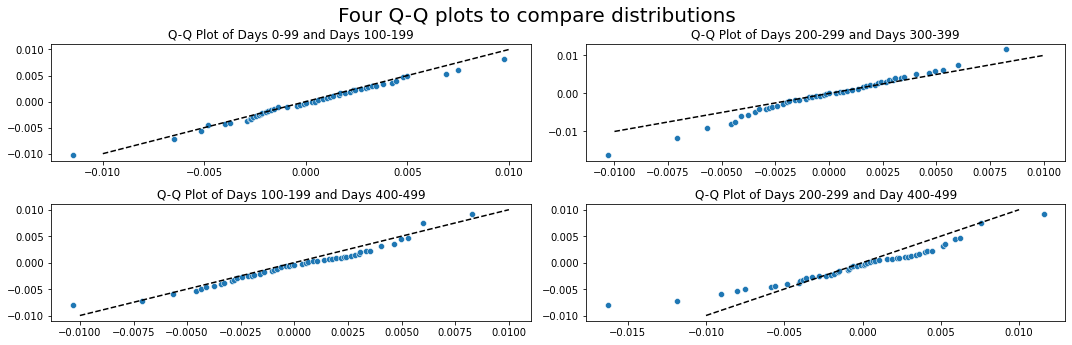

In [243]:
## listBins = [bigBin.loc[bigBin['bin'] == bigBin['bin'].unique()[i]]['returns'] for i in range(5)]

fig, ax = plt.subplots(2, 2, figsize=(15, 5))
# bins 0 and 1
q = np.linspace(0, 1)
sns.scatterplot(x=np.quantile(listBins[0], q), y=np.quantile(listBins[1], q), ax=ax[0,0])
ax[0,0].plot([-0.01, 0.01], [-0.01, 0.01], 'k--')
ax[0,0].set_title('Q-Q Plot of Days 0-99 and Days 100-199')

# bins 1 and 2
sns.scatterplot(x=np.quantile(listBins[1], q), y=np.quantile(listBins[2], q), ax=ax[0,1])
ax[0,1].plot([-0.01, 0.01], [-0.01, 0.01], 'k--')
ax[0,1].set_title('Q-Q Plot of Days 200-299 and Days 300-399')

# bins 1 and 4
sns.scatterplot(x=np.quantile(listBins[1], q), y=np.quantile(listBins[4], q), ax=ax[1,0])
ax[1,0].plot([-0.01, 0.01], [-0.01, 0.01], 'k--')
ax[1,0].set_title('Q-Q Plot of Days 100-199 and Days 400-499')

# bins 2 and 4
sns.scatterplot(x=np.quantile(listBins[2], q), y=np.quantile(listBins[4], q), ax=ax[1,1])
ax[1,1].plot([-0.01, 0.01], [-0.01, 0.01], 'k--')
ax[1,1].set_title('Q-Q Plot of Days 200-299 and Day 400-499')

fig.suptitle('Four Q-Q plots to compare distributions', ha='center', fontsize=20)
fig.tight_layout(rect=[0,0.03,1,0.95])
plt.show()

In [147]:
# nothing significant at all
from scipy.stats import chisquare

chisquare(listBins[2], listBins[4])

Power_divergenceResult(statistic=0.5288045421235806, pvalue=1.0)

In [154]:
counts = df.groupby('date')['weight'].count()
avgReturnsDay['count'] = counts
avgReturnsDay.head()

,date,returns,bin,count
0,0,0.002156,"(-1, 24]",5587
1,1,-0.000105,"(-1, 24]",9401
2,2,-0.000919,"(-1, 24]",231
3,3,-0.002757,"(-1, 24]",7221
4,4,0.001107,"(-1, 24]",10305


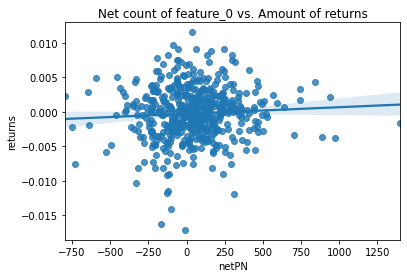

In [207]:
avgReturnsDay['netPN'] = countPN
sns.regplot(x='netPN', y='returns', data=avgReturnsDay)
plt.title('Net count of feature_0 vs. Amount of returns')
plt.show()

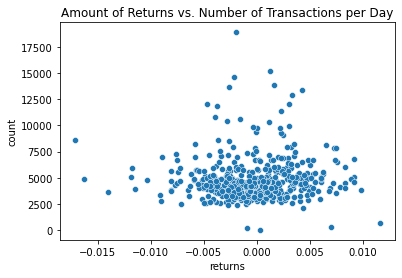

In [245]:
sns.scatterplot(x='returns', y='count', data = avgReturnsDay)
plt.title('Amount of Returns vs. Number of Transactions per Day')
plt.show()

In [163]:
binCounts = avgReturnsDay.assign(bin = pd.cut(avgReturnsDay['count'], np.arange(0, 20000, 1000)))
binCounts.head()

,date,returns,bin,count
0,0,0.002156,"(5000, 6000]",5587
1,1,-0.000105,"(9000, 10000]",9401
2,2,-0.000919,"(0, 1000]",231
3,3,-0.002757,"(7000, 8000]",7221
4,4,0.001107,"(10000, 11000]",10305


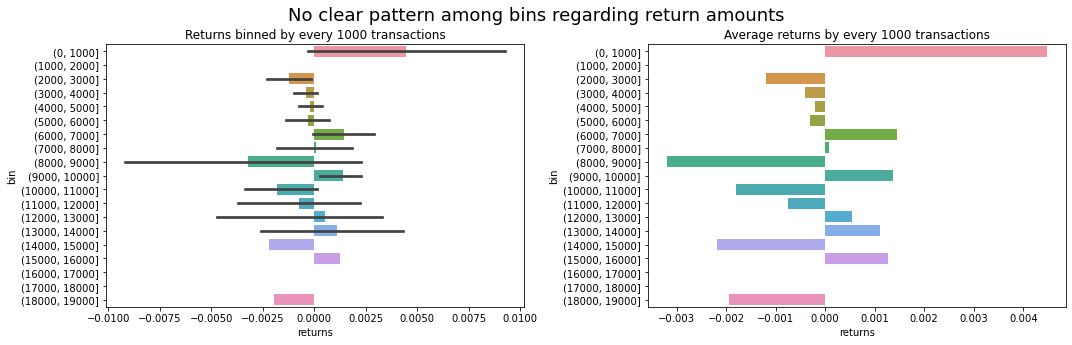

In [252]:
avgBins = binCounts.groupby('bin')['returns'].mean().to_frame().reset_index()

fig, ax = plt.subplots(1, 2, figsize=(15,5))

sns.barplot(x='returns', y='bin', data = binCounts, ax=ax[0])
ax[0].set_title('Returns binned by every 1000 transactions')

sns.barplot(x='returns', y='bin', data=avgBins, ax=ax[1])
ax[1].set_title('Average returns by every 1000 transactions')

fig.tight_layout(rect=[0,0.03, 1,0.95])
plt.suptitle('No clear pattern among bins regarding return amounts', size=18)
plt.show()

## Number of Transactions over time

In [254]:
tot = df.groupby('date')['weight'].count().to_frame().reset_index()
tot.head()

,date,weight
0,0,5587
1,1,9401
2,2,231
3,3,7221
4,4,10305


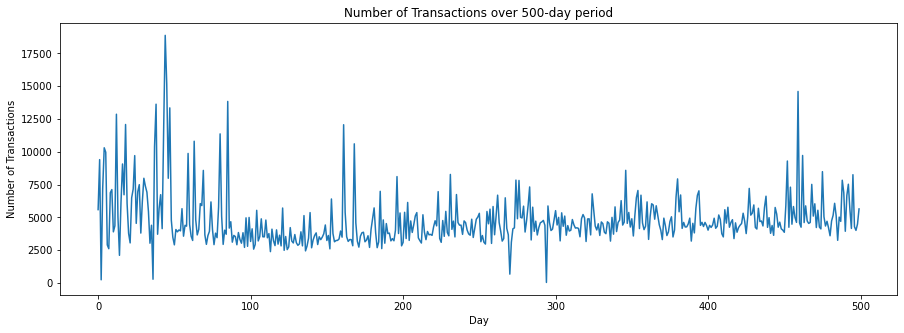

In [260]:
plt.figure(figsize = (15,5))
plt.plot(tot['date'], tot['weight'])
plt.title('Number of Transactions over 500-day period')
plt.xlabel('Day')
plt.ylabel('Number of Transactions')
plt.show()

C:\Users\Cynthia\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


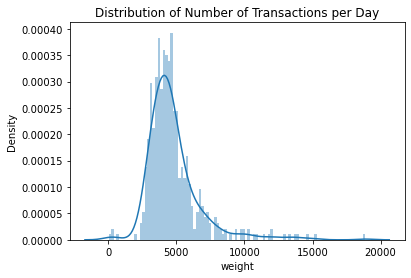

In [265]:
sns.distplot(tot['weight'], bins=100)
plt.title('Distribution of Number of Transactions per Day')
plt.show()

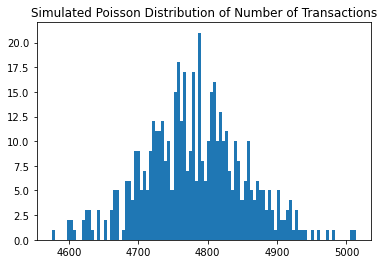

Power_divergenceResult(statistic=425879.848756969, pvalue=0.0)

In [269]:
from scipy.stats import chisquare

sim_pois = np.random.poisson(tot['weight'].mean(), 500)

plt.hist(sim_pois, bins=100)
plt.title('Simulated Poisson Distribution of Number of Transactions')
plt.show()

chisquare(tot['weight'], sim_pois, ddof=1)

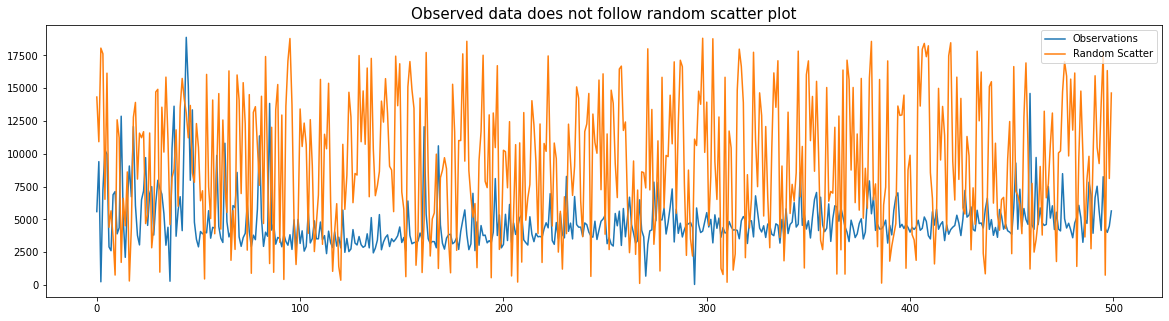

Power_divergenceResult(statistic=3663486.158769977, pvalue=0.0)

In [279]:
from scipy.stats import randint

sim_rand = randint.rvs(1, max(tot['weight']), size=500)

plt.figure(figsize=(20, 5))
plt.plot(tot['weight'], label='Observations')
plt.plot(sim_rand, label='Random Scatter')
plt.title('Observed data does not follow random scatter plot', fontsize=15)
plt.legend()
plt.show()

chisquare(tot['weight'], sim_rand)

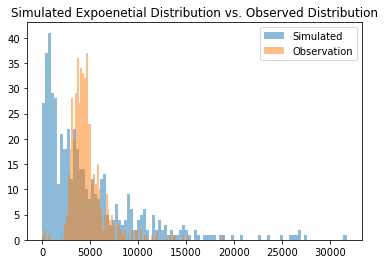

Power_divergenceResult(statistic=41841061.9996376, pvalue=0.0)

In [281]:
sim_exp = np.random.exponential(tot['weight'].mean(), size=500)

plt.hist(sim_exp, alpha = 0.5, bins=100, label='Simulated')
plt.hist(tot['weight'], alpha = 0.5, bins=100, label='Observation')
plt.title('Simulated Expoenetial Distribution vs. Observed Distribution')
plt.legend()
plt.show()

chisquare(tot['weight'], sim_exp, ddof=1)

In [ ]:
sim_norm = np.random.normal(df['weight'].mean(), df['weight'].std(), 500)

plt.hist(sim_norm, alpha = 0.5, bins=100, label='Simulated')
plt.hist(df['weight'], alpha=0.5, bins=100, label='Observation')
plt.legend()
plt.show()

chisquare(df['weight'], sim_norm, ddof=1)